# 0.0 Imports

In [125]:
import pandas as pd
import numpy as np

import seaborn as sns
import scikitplot as skplt

from matplotlib import pyplot as plt

from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

# 0.1 Loading Data

In [126]:
df_raw = pd.read_csv('../data/raw/train.csv')

# 1.0 Data Description

In [127]:
df1 = df_raw.copy()

In [128]:
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']
df1.columns = cols_new

## 1.1 Data Dimension

In [129]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 381109
Number of columns: 12


## 1.2 Data Types

In [130]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3 Check N/A

In [131]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data Descriptive

In [132]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [133]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame(num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis() ) ).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = (['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ])
ct1

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
0,190555.0,38.822584,0.997869,26.388807,0.45821,30564.389581,112.034295,154.347397,0.122563


# 2.0 Feature Engineering

In [134]:
df2 = df1.copy()


In [135]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_years' 
                                                                       if x == '1-2 Year'  else 'below_1_year')
# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 0 if x == 'No' else 1 )

# 3.0 Data Filtering

In [136]:
df3 = df2.copy()

# 4.0 EDA

In [137]:
df4 = df3.copy()

## 4.1 Univariate Analysis

In [138]:
# 'age'
#sns.boxplot(x='response', y='age', data = df4)

In [139]:
#aux00 = df4.loc[df4['response'] == 0, 'age']
#sns.histplot(aux00)

In [140]:
#aux00 = df4.loc[df4['response'] == 1, 'age']
#sns.histplot(aux00)

In [141]:
# 'annual_premium'
#aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000 )]
#sns.boxplot(x = 'response', y='annual_premium', data = aux)

In [142]:
#aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
#sns.histplot(aux00)

In [143]:
# 'driving_license'
#aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
#aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
#aux.head()

In [144]:
# 'region_code'
#aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
#sns.scatterplot(x = 'region_code', y = 'id', hue = 'response', data = aux0)

In [145]:
# 'previously_insured'
#pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis = 1)

In [146]:
# 'vehicle_age'
#df4[['vehicle_age', 'response']].value_counts(normalize = True).reset_index()

In [147]:
# 'policy_sales_channel'
#plt.figure(figsize = (24, 12))
#aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
#sns.barplot(x = 'response', y = 'policy_sales_channel', data = aux)

# 5.0 Data Preparation

In [148]:
df5 =df4.copy()

In [149]:
x = df4.drop('response', axis = 1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(x, y, test_size = 0.2)

df5 = pd.concat([x_train, y_train], axis = 1)

## Standardization

In [150]:
ss = pp. StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

## Rescaling

In [151]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# Age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)

## Encoder

In [152]:
# gender - One Hot Encoding / Target encoding
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map(target_encode_gender)

# region_code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:,'region_code'] = df5['region_code'].map(target_encode_region_code)

# vehicle_age
df5 = pd.get_dummies(df5, prefix = 'vehicle_age', columns = ['vehicle_age'])

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)


## 5.4 Validation Preparation

In [153]:
# Gender
x_validation.loc[:, 'gender'] = x_validation.loc[:, 'gender'].map(target_encode_gender)

# Age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

# region_code
x_validation.loc[:,'region_code'] = x_validation.loc[:, 'region_code'].map(target_encode_region_code)

# vehicle_age
x_validation = pd.get_dummies(x_validation, prefix = 'vehicle_age', columns = ['vehicle_age'])

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform(x_validation[['annual_premium']].values)

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform(x_validation[['vintage']].values)

# fillna
x_validation = x_validation.fillna(0)

# 6.0 Feature Selection

In [154]:
x = df4.drop('response', axis = 1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(x, y, test_size = 0.2)

## 6.1 Features Importance

In [155]:
# Model definition
forest = en.ExtraTreesClassifier(n_estimators = 250, random_state = 0, n_jobs = -1)

# Data preparation
x_train_n = df5.drop(['id', 'response'], axis = 1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

MemoryError: could not allocate 33554432 bytes

In [ ]:
#importances = forest.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0) 
#indices = np.argsort(importances)[::-1]

# Print the feature Ranking
print('Feature Ranking')
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'Feature': i, 'Importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)
    
print(df.sort_values('Importance', ascending=False))

# Plot the impurity-based feature importances of the forest
#plt.figure()
#plt.title('Feature Importances')
#plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
#plt.xticks(range(x_train_n.shape[1]), indices)
#plt.xlim([-1, x_train_n.shape[1]])
#plt.show()

Feature Ranking
                         Feature  Importance
0                        vintage    0.307194
0                 annual_premium    0.302801
0                            age    0.181407
0                    region_code    0.150978
0           policy_sales_channel    0.047854
0                         gender    0.005237
0             previously_insured    0.002192
0                 vehicle_damage    0.001356
0  vehicle_age_between_1_2_years    0.000335
0       vehicle_age_below_1_year    0.000255
0       vehicle_age_over_2_years    0.000196
0                driving_license    0.000195


# 7.0 Machine Learning

In [ ]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured', 'policy_sales_channel']

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]


## 7.1 KNN

In [ ]:
# Model Definition
knn_model = nh.KNeighborsClassifier(n_neighbors= 7)

# Model Training
knn_model.fit(x_train, y_train)

# Model Prediction
yhat_knn = knn_model.predict_proba(x_val)

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

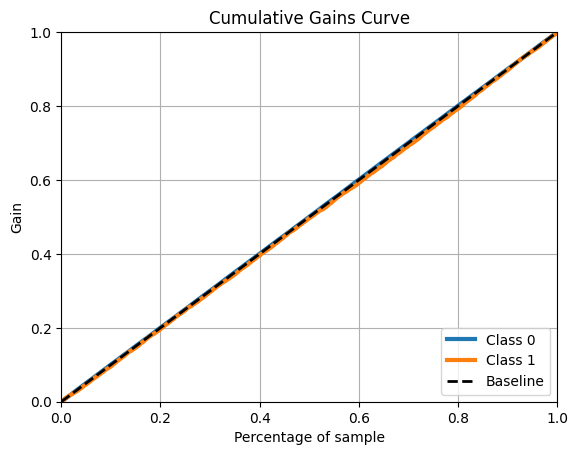

In [ ]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_validation, yhat_knn)

# 8 Model Performance

In [ ]:
def precision_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [ ]:
def recall_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # create ranking order
    data['ranking'] = data.index + 1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [ ]:
# Copy Data
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorted clients by propensity score
df8 = df8.sort_values('score', ascending = False)

# compute precision at k
precision_at_50 = precision_at_k(df8, k=50)
print('Precision at K: {}'.format(precision_at_50))

# compute precision at k
recall_at_50 = recall_at_k(df8, k=50)
print('Recall at K: {}'.format(recall_at_50))

Precision at K: 0.2549019607843137
Recall at K: 0.0014101312506779478
